In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Reading the MNIST Dataset into a csv file using pandas

In [2]:
data = pd.read_csv('/Users/hitengoel/Machine Learning/MNIST from scratch/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting the dataset into testing and training sets

In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) #shuffling the data before splitting

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Initializing parameters for the nodes , defining activation functions , functios for forward and backward propogation

In [5]:
def init_params():
    W1 = np.random.rand(20,784) - 0.5
    b1 = np.random.rand(20,1) - 0.5
    W2 = np.random.rand(10,20) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2
#0th layer- inout layer
#1st layer of 20 nodes
#2nd output layer of 10 nodes

def ReLU(Z):
    return np.maximum(0,Z) #ReLu activation function , returns the number for +ve values,returns 0 for -ve values
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z)) #softmax activation function , gives values between 0 and 1
    return A
def ReLU_deriv(Z): # derivative of ReLU function , 1 for +ve values , 0 for -ve values
    return Z > 0 


def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)  # Using ReLU activation for the 1st layer
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2) #Using Softmax activation for the 2nd layer
    return Z1,A1,Z2,A2

def one_hot(Y):  #one hot encoding the actual answer Y so that we can convert it into usable format to use in backpropagation 
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y #error in the output of the second layer
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1) #error in the output of the first layer, also needed to reverse the ReLU function to find this out
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha): #funtion to update the parameters based on a learning rate alpha
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

Running Gradient Descent

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0) #the softmax fucntion output at the second layer gives us the probability of each individual outcome.
    #this function gives the outcome with maximum probability as the prediction.
    
def get_accuracy(predictions, Y): #function to get the accuracy of our predictions.
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations): 
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:   #printing the accuracy every 10 iterations 
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Acciuracy :", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 1 5 ... 0 3 3] [7 9 1 ... 0 2 5]
Acciuracy : 0.149
Iteration:  10
[9 1 7 ... 0 3 2] [7 9 1 ... 0 2 5]
Acciuracy : 0.23629268292682926
Iteration:  20
[9 9 7 ... 0 3 6] [7 9 1 ... 0 2 5]
Acciuracy : 0.35992682926829267
Iteration:  30
[9 9 7 ... 0 3 6] [7 9 1 ... 0 2 5]
Acciuracy : 0.4543658536585366
Iteration:  40
[4 9 7 ... 0 2 6] [7 9 1 ... 0 2 5]
Acciuracy : 0.5201463414634147
Iteration:  50
[4 9 7 ... 0 2 6] [7 9 1 ... 0 2 5]
Acciuracy : 0.5709024390243902
Iteration:  60
[4 4 1 ... 0 2 8] [7 9 1 ... 0 2 5]
Acciuracy : 0.6092439024390244
Iteration:  70
[7 4 1 ... 0 2 8] [7 9 1 ... 0 2 5]
Acciuracy : 0.6403658536585366
Iteration:  80
[7 4 1 ... 0 2 8] [7 9 1 ... 0 2 5]
Acciuracy : 0.6640975609756098
Iteration:  90
[7 4 1 ... 0 2 8] [7 9 1 ... 0 2 5]
Acciuracy : 0.6844634146341464
Iteration:  100
[7 4 1 ... 0 2 8] [7 9 1 ... 0 2 5]
Acciuracy : 0.7018536585365853
Iteration:  110
[7 4 1 ... 0 2 8] [7 9 1 ... 0 2 5]
Acciuracy : 0.717390243902439
Iteration:  120
[7 4 1 ... 

In [8]:
def make_predictions(X, W1, b1, W2, b2): #function to get our final predictions
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2): #function to test our function over various testcases
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Few Example test cases

Prediction:  [7]
Label:  7


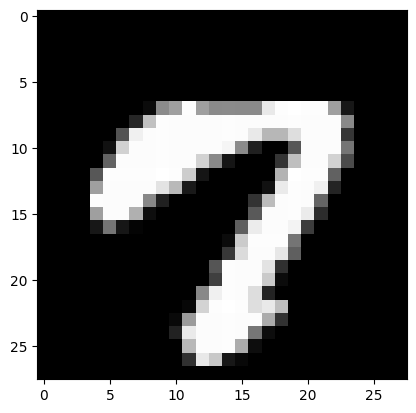

Prediction:  [7]
Label:  7


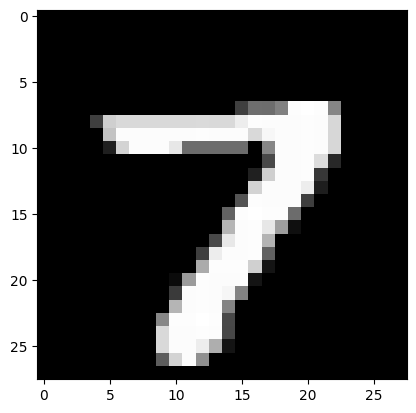

Prediction:  [4]
Label:  4


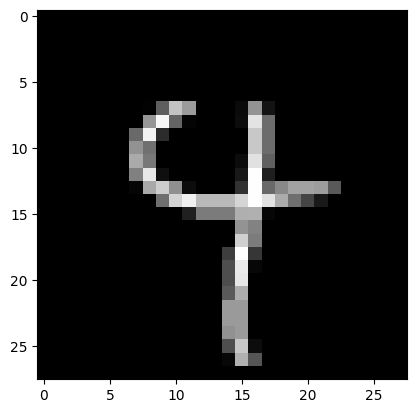

Prediction:  [9]
Label:  4


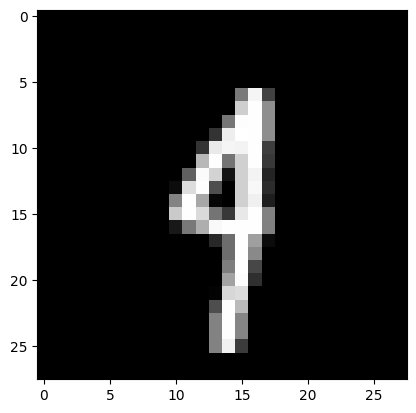

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(15, W1, b1, W2, b2)
test_prediction(21, W1, b1, W2, b2)
test_prediction(34, W1, b1, W2, b2)

Testing our accuracy with the test set

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Accuracy :",get_accuracy(dev_predictions, Y_dev))

[2 7 4 3 8 9 4 5 3 5 7 9 3 6 1 3 8 7 6 1 3 9 9 1 2 2 8 7 7 2 4 8 4 7 2 4 1
 0 8 8 0 0 3 3 6 8 1 3 9 1 1 5 4 6 5 5 1 3 9 4 7 8 4 7 5 1 0 7 5 2 5 9 9 1
 7 0 5 6 7 6 6 3 9 7 8 6 0 0 8 8 0 3 3 5 3 3 1 6 9 6 6 3 6 8 2 7 8 4 0 5 9
 4 3 4 6 2 7 4 7 4 9 4 9 2 0 0 1 8 4 4 6 8 1 7 5 3 9 3 5 6 7 0 1 2 5 4 5 4
 2 0 8 0 6 6 6 9 6 2 7 0 1 9 8 9 1 8 1 9 7 0 2 0 0 0 1 6 1 6 5 6 0 0 1 8 7
 4 5 7 0 8 5 3 8 8 4 7 7 3 1 8 2 7 6 0 1 7 0 4 1 7 3 8 7 9 2 7 2 4 6 2 0 5
 2 7 5 1 7 2 7 3 7 4 5 6 5 9 7 4 6 7 1 4 8 3 2 0 6 3 9 9 6 0 1 2 2 2 1 3 9
 9 7 4 1 0 9 1 6 2 0 6 6 9 4 1 5 6 3 4 2 8 4 9 0 7 9 5 6 6 2 9 4 9 6 9 4 4
 1 9 0 2 9 9 9 7 0 1 0 3 9 2 1 1 1 9 6 0 2 9 7 5 3 7 6 0 4 4 1 1 3 7 5 9 6
 9 8 3 6 7 4 2 7 1 9 4 0 1 4 0 2 3 4 9 6 1 3 1 2 0 5 5 8 7 0 1 4 1 9 3 6 1
 8 9 5 5 9 0 4 2 5 1 0 1 6 3 2 2 6 6 6 1 9 9 8 3 2 6 5 0 6 6 9 5 5 1 1 9 1
 2 9 8 4 1 3 3 0 7 9 3 9 5 3 3 5 5 6 0 3 7 5 0 2 4 0 0 1 8 4 8 7 0 4 2 4 3
 9 1 8 7 9 4 0 1 0 7 8 5 9 0 1 0 5 7 4 2 5 6 6 3 6 0 6 4 0 1 5 1 4 9 0 3 6
 3 7 9 5 5 4 9 6 2 2 5 8 